In [1]:
%matplotlib inline
from matplotlib.pylab import plt
import os,sys
import numpy as np
from sklearn import decomposition

/Users/rahulkrishnan/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Factor Analysis on self-reported personality data
Reference: http://web.stanford.edu/class/psych253/tutorials/FactorAnalysis.html


In [2]:
if not os.path.exists('personality0.txt'):
    ret = os.system('wget http://web.stanford.edu/class/psych253/data/personality0.txt .')
    if ret!=0:
        ret = os.system('curl -o personality0.txt http://web.stanford.edu/class/psych253/data/personality0.txt')
        if ret!=0:
            assert False,'Please download http://web.stanford.edu/class/psych253/data/personality0.txt'
print 'File: ',os.path.exists('personality0.txt')

File:  True


In [11]:
with open('personality0.txt') as f:
    headers = [k.strip().replace('"','') for k in f.readline().split(' ')]
print 'Headers: ',headers,len(headers)
data = np.loadtxt('personality0.txt',usecols=range(1,len(headers)+1),skiprows=1)
assert data.shape==(240,len(headers))

Headers:  ['distant', 'talkatv', 'carelss', 'hardwrk', 'anxious', 'agreebl', 'tense', 'kind', 'opposng', 'relaxed', 'disorgn', 'outgoin', 'approvn', 'shy', 'discipl', 'harsh', 'persevr', 'friendl', 'worryin', 'respnsi', 'contrar', 'sociabl', 'lazy', 'coopera', 'quiet', 'organiz', 'criticl', 'lax', 'laidbck', 'withdrw', 'givinup', 'easygon'] 32


In [12]:
%%latex
$\textbf{Visualize the Correlations}: $
$\text{Cor}(X_i,Y_j) = \frac{\text{Cov}(X_i,Y_j)}{\sigma_{X_i}\sigma_{Y_j}}$

<IPython.core.display.Latex object>

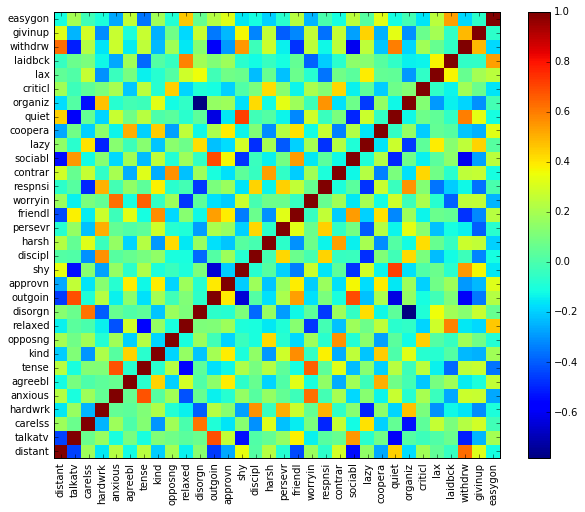

In [13]:
R = np.corrcoef(data.T)
plt.figure(figsize=(10,8))
plt.pcolor(R)
plt.colorbar()
plt.xlim([0,len(headers)])
plt.ylim([0,len(headers)])
plt.xticks(np.arange(32)+0.5,np.array(headers),rotation='vertical')
plt.yticks(np.arange(32)+0.5,np.array(headers))
plt.show()

In [14]:
#Lets fit both the models using PCA/FA down to two dimensions
n_components = 2
pca = decomposition.PCA(n_components=n_components, svd_solver='full', whiten=True)
fa  = decomposition.FactorAnalysis(n_components=n_components, max_iter=20)
pca.fit(data)
fa.fit(data)

FactorAnalysis(copy=True, iterated_power=3, max_iter=20, n_components=2,
        noise_variance_init=None, random_state=0, svd_method='randomized',
        tol=0.01)

In [15]:
#Lets transform the data
data_pca = pca.transform(data)
data_fa  = fa.transform(data)
print data_pca.shape, data_fa.shape

(240, 2) (240, 2)


In [16]:
pca_comp    = pca.components_.T
fa_comp     = fa.components_.T
print pca_comp.shape, fa_comp.shape

(32, 2) (32, 2)


In [9]:
N = 10
def plot_scatter_annotate(data,labels,title):
    plt.figure(figsize=(10,10))
    assert data.shape[0]==len(labels),'size mismatch'
    plt.subplots_adjust(bottom = 0.1)
    plt.scatter(
        data[:, 0], data[:, 1], marker = 'o', s = 100,
        cmap = plt.get_cmap('Spectral'))
    plt.title(title)
    for label, x, y in zip(labels, data[:, 0], data[:, 1]):
        plt.annotate(
            label, 
            xy = (x, y), xytext = (-20, 20),
            textcoords = 'offset points', ha = 'right', va = 'bottom',
            bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
            arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
    plt.show()

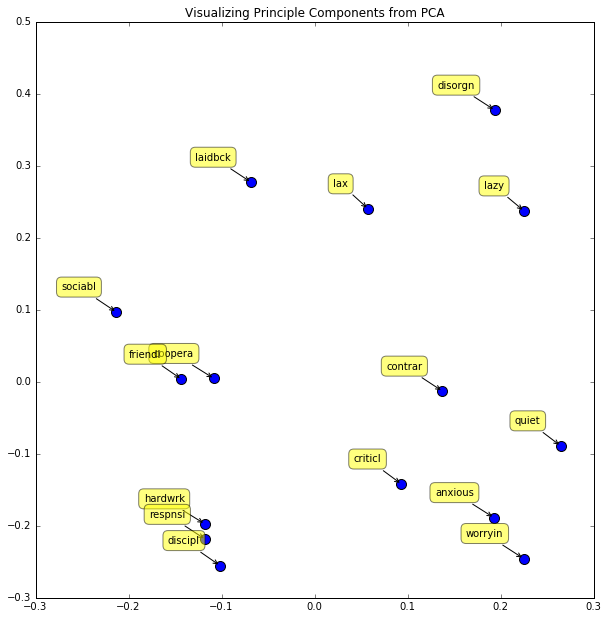

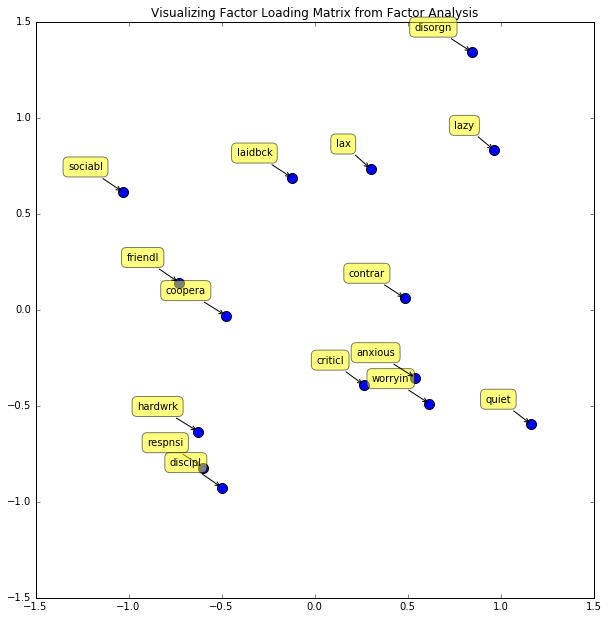

In [10]:
np.random.seed(1)
idxlist = np.random.permutation(len(headers))[:15]
dset_pca = pca_comp[idxlist]
dset_fa = fa_comp[idxlist]
hdr_sub = [headers[k] for k in idxlist.tolist()]
plot_scatter_annotate(dset_pca,hdr_sub,'Visualizing Principle Components from PCA')
plot_scatter_annotate(dset_fa,hdr_sub,'Visualizing Factor Loading Matrix from Factor Analysis')